In [1]:
import pandas as pd

In [2]:
house = pd.read_csv("./archive/Bengaluru_House_Data.csv")
house.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
#deleting the unnecessary columns
house.drop(['area_type','availability','society'],axis=1,inplace=True)
house.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [5]:
#NA values
house.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [6]:
house.dtypes

location       object
size           object
total_sqft     object
bath          float64
balcony       float64
price         float64
dtype: object

In [7]:
import math
bath_median = math.floor(house.bath.median())
balcony_median = math.floor(house.balcony.median())

house['bath'].fillna(bath_median,inplace=True)
house['balcony'].fillna(balcony_median,inplace=True)

In [8]:
house.isnull().sum()

location       1
size          16
total_sqft     0
bath           0
balcony        0
price          0
dtype: int64

In [9]:
house.dropna(inplace=True)
house.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [10]:
house.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [11]:
house['bhk'] = house['size'].apply(lambda x: int(x.split(' ')[0]))
house.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [12]:
house.bhk.dtype

dtype('int64')

In [13]:
house.drop('size',axis=1,inplace=True)
house.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


In [14]:
house.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
house[~(house.total_sqft.apply(isfloat))]

,location,total_sqft,bath,balcony,price,bhk
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
56,Devanahalli,3010 - 3410,2.0,2.0,192.000,4
81,Hennur Road,2957 - 3450,2.0,2.0,224.500,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
...,...,...,...,...,...,...
12990,Talaghattapura,1804 - 2273,3.0,0.0,122.000,3
13059,Harlur,1200 - 1470,2.0,0.0,72.760,2
13240,Devanahalli,1020 - 1130,2.0,2.0,52.570,1
13265,Hoodi,1133 - 1384,2.0,0.0,59.135,2


In [17]:
def convert(x):
    tokens = x.split('-')
    if(len(tokens)==2):
        return (float(tokens[0])+float(tokens[1])/2)
    try:
        return float(x)
    except:
        return None

In [18]:
house['total_sqft'] = house.total_sqft.apply(convert)
house.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


In [19]:
house.total_sqft.unique()

array([1056., 2600., 1440., ..., 2758.,  774., 4689.])

In [20]:
house.isnull().sum()

location       0
total_sqft    46
bath           0
balcony        0
price          0
bhk            0
dtype: int64

In [21]:
house.dropna(inplace=True)

In [22]:
house.isnull().sum()

location      0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [23]:
house['price_per_sqft'] = (house['price']*100000)/house['total_sqft']
house.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [24]:
house = house.reindex(columns=['location','total_sqft','bhk','bath','balcony','price','price_per_sqft'])
house.head()

,location,total_sqft,bhk,bath,balcony,price,price_per_sqft
0,Electronic City Phase II,1056.0,2,2.0,1.0,39.07,3699.810606
1,Chikka Tirupathi,2600.0,4,5.0,3.0,120.00,4615.384615
2,Uttarahalli,1440.0,3,2.0,3.0,62.00,4305.555556
3,Lingadheeranahalli,1521.0,3,3.0,1.0,95.00,6245.890861
4,Kothanur,1200.0,2,2.0,1.0,51.00,4250.000000


In [25]:
house.price_per_sqft.describe()

count    1.325700e+04
mean     7.888878e+03
std      1.064983e+05
min      2.678298e+02
25%      4.230769e+03
50%      5.416667e+03
75%      7.294833e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [26]:
house[house['bhk']>10].head(10)

,location,total_sqft,bhk,bath,balcony,price,price_per_sqft
459,1 Giri Nagar,5000.0,11,9.0,3.0,360.0,7200.000000
1718,2Electronic City Phase II,8000.0,27,27.0,0.0,230.0,2875.000000
1768,1 Ramamurthy Nagar,1200.0,11,11.0,0.0,170.0,14166.666667
3379,1Hanuman Nagar,2000.0,19,16.0,2.0,490.0,24500.000000
3609,Koramangala Industrial Layout,10000.0,16,16.0,2.0,550.0,5500.000000
3853,1 Annasandrapalya,1200.0,11,6.0,3.0,150.0,12500.000000
4684,Munnekollal,2400.0,43,40.0,0.0,660.0,27500.000000
4916,1Channasandra,1250.0,14,15.0,0.0,125.0,10000.000000
6533,Mysore Road,2232.0,12,6.0,2.0,300.0,13440.860215
7979,1 Immadihalli,6000.0,11,12.0,2.0,150.0,2500.000000


In [27]:
#here in the above cell we can see that there are houses with 11bhk and total_sqft=1200,i.e100sqft/bhk,
#which is impractical.
#so lets delete all those rows where houses.sqft/houses.bhk<250
house = house[house['total_sqft']/house['bhk']>=250]

In [28]:
house.shape

(12645, 7)

In [29]:
house.location.nunique()

1232

In [30]:
#here location is a very high dimensional column.We need apply dimensionality reduction by including those rows 
#with less than 10 occurences in others.
house['location'] = house['location'].apply(lambda x:x.strip())

In [31]:
locations = house.location.value_counts().sort_values(ascending=False)
locations

Whitefield             537
Sarjapur  Road         395
Electronic City        302
Kanakpura Road         269
Thanisandra            235
                      ... 
sarjapura main road      1
Vayunandana Layout       1
Satyasaibaba Layout      1
M C Layout               1
Defence Layout           1
Name: location, Length: 1221, dtype: int64

In [32]:
len(locations[locations<=10])

995

In [33]:
locations_less_than_10 = locations[locations<10]
locations_less_than_10

4th Block Koramangala    9
Ejipura                  9
Kaverappa Layout         9
Chennammana Kere         9
Peenya                   9
                        ..
sarjapura main road      1
Vayunandana Layout       1
Satyasaibaba Layout      1
M C Layout               1
Defence Layout           1
Name: location, Length: 981, dtype: int64

In [34]:
house.location = house.location.apply(lambda x:"others" if x in locations_less_than_10 else x)
house.head(20)

,location,total_sqft,bhk,bath,balcony,price,price_per_sqft
0,Electronic City Phase II,1056.0,2,2.0,1.0,39.07,3699.810606
1,Chikka Tirupathi,2600.0,4,5.0,3.0,120.00,4615.384615
2,Uttarahalli,1440.0,3,2.0,3.0,62.00,4305.555556
3,Lingadheeranahalli,1521.0,3,3.0,1.0,95.00,6245.890861
4,Kothanur,1200.0,2,2.0,1.0,51.00,4250.000000
5,Whitefield,1170.0,2,2.0,1.0,38.00,3247.863248
6,Old Airport Road,2732.0,4,4.0,2.0,204.00,7467.057101
7,Rajaji Nagar,3300.0,4,4.0,2.0,600.00,18181.818182
8,Marathahalli,1310.0,3,3.0,1.0,63.25,4828.244275
10,Whitefield,1800.0,3,2.0,2.0,70.00,3888.888889


In [35]:
import numpy as np

In [36]:
#now lets group the rows location wise and delete those entries in which price_per_sqft is less than (mean-std) 
#or price_per_sqft is more than (mean+std)
def check_pps(df):
    reduced_df = pd.DataFrame()
    for location,location_df in df.groupby('location'):
        m = np.mean(location_df.price_per_sqft)
        s = np.std(location_df.price_per_sqft)
        less_df = location_df[(location_df.price_per_sqft>=m-s) & (location_df.price_per_sqft<=m+s)]
        reduced_df = pd.concat([reduced_df,less_df],ignore_index=True)
    return reduced_df

In [37]:
house.shape

(12645, 7)

In [38]:
house2 = check_pps(house)
house2.shape

(10416, 7)

In [39]:
house2.price_per_sqft.describe()

count    10416.000000
mean      5670.547329
std       2302.686199
min       1250.000000
25%       4211.233729
50%       5172.413793
75%       6457.881161
max      24000.000000
Name: price_per_sqft, dtype: float64

In [40]:
house2.head()

,location,total_sqft,bhk,bath,balcony,price,price_per_sqft
0,1st Block Jayanagar,2850.0,4,4.0,1.0,428.0,15017.543860
1,1st Block Jayanagar,1630.0,3,3.0,2.0,194.0,11901.840491
2,1st Block Jayanagar,1875.0,3,2.0,3.0,235.0,12533.333333
3,1st Block Jayanagar,1200.0,3,2.0,0.0,130.0,10833.333333
4,1st Block Jayanagar,1235.0,2,2.0,2.0,148.0,11983.805668


In [41]:
house2.balcony.unique()

array([1., 2., 3., 0.])

In [42]:
house2[(house2['balcony']==3)]

,location,total_sqft,bhk,bath,balcony,price,price_per_sqft
2,1st Block Jayanagar,1875.0,3,2.0,3.0,235.0,12533.333333
7,1st Block Koramangala,1415.0,2,2.0,3.0,110.0,7773.851590
9,1st Block Koramangala,3000.0,4,3.0,3.0,300.0,10000.000000
11,1st Block Koramangala,3000.0,4,5.0,3.0,500.0,16666.666667
12,1st Phase JP Nagar,2825.0,4,4.0,3.0,250.0,8849.557522
...,...,...,...,...,...,...,...
10372,others,1369.0,3,2.0,3.0,72.0,5259.313367
10386,others,2872.0,4,4.0,3.0,183.0,6371.866295
10390,others,1800.0,7,5.0,3.0,65.0,3611.111111
10392,others,1975.0,3,3.0,3.0,90.0,4556.962025


In [43]:
#here we can see that in 2nd row of above result that bhk=2 and balcony=3,which is impractical.so we will delete
#all those entries with bhk<balcony
house2.shape

(10416, 7)

In [44]:
house2 = house2[(house2.bhk>=house2.balcony)]
house2.shape

(10083, 7)

In [45]:
#also if we assume that every bedroom has one bathroom,then at max bathroom=bhk.so we need to delete all those 
#entries with bathroom>bhk
house2 = house2[(house2.bhk>=house2.bath)]
house2.shape

(9512, 7)

In [46]:
from matplotlib import pyplot as plt
%matplotlib inline

In [47]:
def plot_scatter(df,location):
    df2 = df[(df.location==location) & (df.bhk==2)]
    df3 = df[(df.location==location) & (df.bhk==3)]
    plt.scatter(df2.price_per_sqft,df2.price,color='red',label='2BHK')
    plt.scatter(df3.price_per_sqft,df3.price,marker='*',color='green',label='3BHK')
    plt.xlabel('price_per_sqft')
    plt.ylabel('bhk')
    plt.title(location)
    plt.legend()
    plt.plot()

In [48]:
house2.location.value_counts()

others                   2098
Whitefield                417
Electronic City           281
Sarjapur  Road            278
Kanakpura Road            180
                         ... 
Benson Town                 4
Dairy Circle                3
1st Block Koramangala       3
Sarakki Nagar               3
Kodihalli                   2
Name: location, Length: 241, dtype: int64

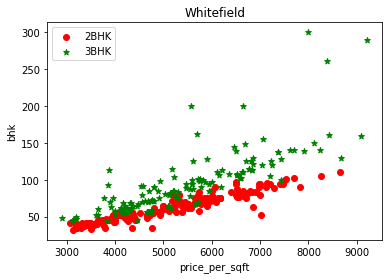

In [49]:
plot_scatter(house2,'Whitefield')

In [50]:
house2.head()

,location,total_sqft,bhk,bath,balcony,price,price_per_sqft
0,1st Block Jayanagar,2850.0,4,4.0,1.0,428.0,15017.543860
1,1st Block Jayanagar,1630.0,3,3.0,2.0,194.0,11901.840491
2,1st Block Jayanagar,1875.0,3,2.0,3.0,235.0,12533.333333
3,1st Block Jayanagar,1200.0,3,2.0,0.0,130.0,10833.333333
4,1st Block Jayanagar,1235.0,2,2.0,2.0,148.0,11983.805668


In [51]:
dummies = pd.get_dummies(house2.location)
dummies.drop('others',axis=1,inplace=True)
dummies.head()

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
house2.isnull().sum()

location          0
total_sqft        0
bhk               0
bath              0
balcony           0
price             0
price_per_sqft    0
dtype: int64

In [53]:
house3 = pd.concat([house2,dummies],axis=1)
house3

,location,total_sqft,bhk,bath,balcony,price,price_per_sqft,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4,4.0,1.0,428.00,15017.543860,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3,3.0,2.0,194.00,11901.840491,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,3,2.0,3.0,235.00,12533.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,3,2.0,0.0,130.00,10833.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2,2.0,2.0,148.00,11983.805668,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10410,others,1256.0,2,2.0,1.0,65.00,5175.159236,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10411,others,1353.0,2,2.0,2.0,110.00,8130.081301,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10412,others,812.0,1,1.0,0.0,26.00,3201.970443,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10413,others,1440.0,3,2.0,2.0,63.93,4439.583333,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
house3.drop(['location','price_per_sqft'],axis=1,inplace=True)

In [55]:
house3.head()

,total_sqft,bhk,bath,balcony,price,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4,4.0,1.0,428.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3,3.0,2.0,194.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,3,2.0,3.0,235.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,3,2.0,0.0,130.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2,2.0,2.0,148.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
X = house3.drop('price',axis=1)
y = house3.price

In [57]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [59]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [60]:
model.score(X_test,y_test)

0.786054851405912

In [61]:
#evaluating ML model using k-fold cross validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=10,test_size=0.25,random_state=42)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.78605485, 0.73894347, 0.77673899, 0.81833292, 0.82809008,
       0.7940291 , 0.79051031, 0.85766272, 0.82709903, 0.74313072])

In [62]:
def predict_price(location,sqft,bhk,bath,balcony):
    index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bhk
    x[2] = bath
    x[3] = balcony
    if(index>=4):
        x[index]=1
    return model.predict([x])[0]

In [65]:
predict_price('1st Block Jayanagar',2500,4,2,2)

299.8940947034398

In [66]:
import pickle
model_file = 'house_price_prediction_model.pickle'
with open(model_file,'wb') as f:
    pickle.dump(model,f)

In [68]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))
